# Capstone Project 1: MuscleHub AB Test

## Step 1: Getting started with SQL

Janet keeps her data in a SQL database. From the SQL_client.py file we will import the method `sql_query`, which returns SQL queries as Pandas DataFrames. 

In [29]:
from SQL_client import sql_query
import pandas as pd

In [32]:
# Here's an example of a query that displays some data from the visits table
df = sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

df

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


## Step 2: The dataset

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Below, we will examine each table.

In [35]:
# Visits table
sql_query("""
SELECT * 
FROM visits
LIMIT 5
""")

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [36]:
# Fitness_tests table
sql_query("""
SELECT * 
FROM fitness_tests
LIMIT 5
""")

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [37]:
# Applications table
sql_query("""
SELECT * 
FROM applications
LIMIT 5
""")

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [38]:
# Purchases table
sql_query("""
SELECT *
FROM purchases
LIMIT 5
""")

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


We'd like to define a giant DataFrame containing all of this data.  We'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  We'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. We'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  We'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [46]:
df = sql_query("""
SELECT v.first_name, v.last_name, v.gender, v.email, v.visit_date, 
f.fitness_test_date, a.application_date, p.purchase_date
FROM visits as v
LEFT JOIN fitness_tests as f ON v.email = f.email
LEFT JOIN applications as a ON v.email = a.email
LEFT JOIN purchases as p ON v.email = p.email
""")

# Use Pandas to filter data to visits after 7-1-17
df['visit_date_conv'] = pd.to_datetime(df['visit_date']) 
df_filtered = df[df.visit_date_conv >= "2017-07-01"]

print("The dataFrame has " +str(len(df_filtered)) +" rows")
print("")
print(df_filtered.head())

# since the filter seems to be succesful, df is updated with the filtered values
df = df_filtered

The dataFrame has 5006 rows

     first_name last_name  gender                   email visit_date  \
1000        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1001        Tom   Webster    male        TW3857@gmail.com     7-1-17   
1002     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
1003     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
1004    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

     fitness_test_date application_date purchase_date visit_date_conv  
1000        2017-07-03             None          None      2017-07-01  
1001        2017-07-02             None          None      2017-07-01  
1002              None       2017-07-04    2017-07-04      2017-07-01  
1003        2017-07-01       2017-07-03    2017-07-05      2017-07-01  
1004        2017-07-02             None          None      2017-07-01  


## Step 3: Investigate the A and B groups

In [48]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

We're going to add some columns to `df` to help us with our analysis.

We'll add a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [50]:
df['ab_test_group'] = df.apply((lambda row: 'A' if row.fitness_test_date != None else 'B'), axis=1)
print(df.head())


     first_name last_name  gender                   email visit_date  \
1000        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1001        Tom   Webster    male        TW3857@gmail.com     7-1-17   
1002     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
1003     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
1004    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

     fitness_test_date application_date purchase_date visit_date_conv  \
1000        2017-07-03             None          None      2017-07-01   
1001        2017-07-02             None          None      2017-07-01   
1002              None       2017-07-04    2017-07-04      2017-07-01   
1003        2017-07-01       2017-07-03    2017-07-05      2017-07-01   
1004        2017-07-02             None          None      2017-07-01   

     ab_test_group  
1000             A  
1001             A  
1002             B  
1003             A  
1004             A  


We'll check that Janet split her visitors such that about half are in A and half are in B.

We'll start by using `groupby` to count how many users are in each `ab_test_group` and save the results to `ab_counts`.

In [51]:
ab_counts = df.groupby('ab_test_group').email.count().reset_index()
ab_counts.rename(columns={"email":"users"}, inplace=True)
print(ab_counts)

  ab_test_group  users
0             A   2509
1             B   2497


We'll want to include this information in our presentation.  We'll create a pie cart using `plt.pie`.

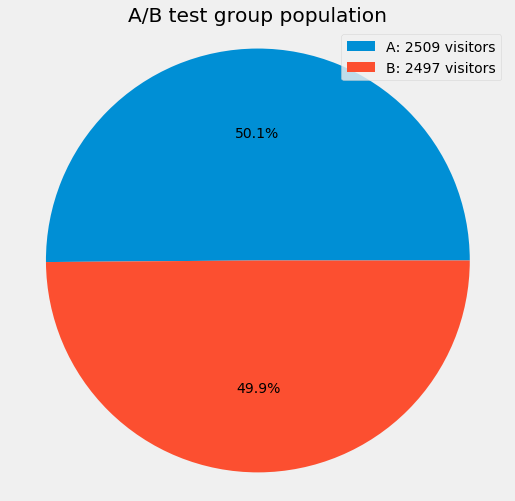

In [13]:
plt.figure(figsize=(8,8))
piedata= ab_counts.users.values
plt.pie(ab_counts.users.values, autopct='%0.1f%%')
plt.axis('equal')
plt.legend(['A: ' +str(piedata[0]) +' visitors' , 'B: ' +str(piedata[1]) +' visitors'])
plt.title('A/B test group population')
plt.savefig('ab_test_pie_chart_v2.png')
plt.show()

## Step 4: Who picks up an application?

The sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in a payment for their first month's membership

We'll examine how many people make it to Step 2, filling out an application.

We'll create a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application` otherwise.

In [54]:
df['is_application'] = df.apply((lambda row: "Application" if row.application_date != None else "No Application"), axis=1)
print(df.head())

     first_name last_name  gender                   email visit_date  \
1000        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1001        Tom   Webster    male        TW3857@gmail.com     7-1-17   
1002     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
1003     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
1004    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

     fitness_test_date application_date purchase_date visit_date_conv  \
1000        2017-07-03             None          None      2017-07-01   
1001        2017-07-02             None          None      2017-07-01   
1002              None       2017-07-04    2017-07-04      2017-07-01   
1003        2017-07-01       2017-07-03    2017-07-05      2017-07-01   
1004        2017-07-02             None          None      2017-07-01   

     ab_test_group  is_application  
1000             A  No Application  
1001             A  No Application  
1002             

Now, using `groupby`, we'll count how many people from Group A and Group B either do or don't pick up an application.

In [55]:
app_counts = df.groupby(['ab_test_group', 'is_application']).email.count().reset_index()
print(app_counts)

  ab_test_group  is_application  email
0             A     Application    250
1             A  No Application   2259
2             B     Application    325
3             B  No Application   2172


We're going to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
We'll save this pivot to the variable `app_pivot`.

In [56]:
app_pivot = app_counts.pivot(columns='is_application', index='ab_test_group', values='email').reset_index()
print(app_pivot)

is_application ab_test_group  Application  No Application
0                          A          250            2259
1                          B          325            2172


The new column `Total` is the sum of `Application` and `No Application`.

In [57]:
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']
print(app_pivot)

is_application ab_test_group  Application  No Application  Total
0                          A          250            2259   2509
1                          B          325            2172   2497


We'll also add another column called `Percent with Application`.

In [59]:
app_pivot['Percent with Application'] = 100 * app_pivot['Application'] / app_pivot['No Application']
print(app_pivot)

is_application ab_test_group  Application  No Application  Total  \
0                          A          250            2259   2509   
1                          B          325            2172   2497   

is_application  Percent with Application  
0                              11.066844  
1                              14.963168  


More people from Group B turned in an application.

We need to know if this difference is statistically significant.

In [71]:
"""
A chi-squared will be applicable, as we are testing the significance of
differences in categorical values of a 'full' population.

We let the zero-hypothesis state that there is no significant difference in the 
application % of either test

We set the significance level at 95 %

"""

from scipy.stats import chi2_contingency

# Contingency table
# Test      Total  |  Applicants
# --------------------------
# A      | 2509    |  250
# B      | 2497    |  325

test_values = [[2509, 250],[2497,325]]

chi2,pval,dof,expected = chi2_contingency(test_values)

print("P-value is " +str(pval)) # = 0.0029

print(""" 
As this p-value is < 0.05 we can reject the zero hypothesis 
and state that there is a significant difference 
in the percentage of users who filed an application in the two tests.
""")

P-value is 0.0029508491727
 
As this p-value is < 0.05 we can reject the zero hypothesis 
and state that there is a significant difference 
in the percentage of users who filed an application in the two tests.



## Step 5: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

We'll begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [67]:
df['is_member'] = df.apply((lambda row: "Member" if row.purchase_date != None else "Not Member"), axis=1)
print(df.head())

     first_name last_name  gender                   email visit_date  \
1000        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1001        Tom   Webster    male        TW3857@gmail.com     7-1-17   
1002     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
1003     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
1004    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

     fitness_test_date application_date purchase_date visit_date_conv  \
1000        2017-07-03             None          None      2017-07-01   
1001        2017-07-02             None          None      2017-07-01   
1002              None       2017-07-04    2017-07-04      2017-07-01   
1003        2017-07-01       2017-07-03    2017-07-05      2017-07-01   
1004        2017-07-02             None          None      2017-07-01   

     ab_test_group  is_application   is_member  
1000             A  No Application  Not Member  
1001             A  No Applica

Now, we'll create a DataFrame called `just_apps` that contains only people who picked up an application.

In [68]:
just_apps = df[df.is_application == 'Application'].reset_index()
print(just_apps.head())

   index first_name last_name  gender                    email visit_date  \
0   1002     Edward     Bowen    male   Edward.Bowen@gmail.com     7-1-17   
1   1003     Marcus     Bauer    male   Marcus.Bauer@gmail.com     7-1-17   
2   1009   Salvador  Cardenas    male  SCardenas1980@gmail.com     7-1-17   
3   1011    Valerie     Munoz  female     VMunoz1998@gmail.com     7-1-17   
4   1035    Michael     Burks    male         MB9820@gmail.com     7-1-17   

  fitness_test_date application_date purchase_date visit_date_conv  \
0              None       2017-07-04    2017-07-04      2017-07-01   
1        2017-07-01       2017-07-03    2017-07-05      2017-07-01   
2        2017-07-07       2017-07-06          None      2017-07-01   
3        2017-07-03       2017-07-05    2017-07-06      2017-07-01   
4              None       2017-07-07    2017-07-13      2017-07-01   

  ab_test_group is_application   is_member  
0             B    Application      Member  
1             A    Applica

Now, we'll do a `groupby` to find out how many people in `just_apps` are and aren't members from each group following the same process that we did in Step 4, including pivoting the data.

In [69]:
# Create new DF with grouping by is_member and ab_test_group
apps_grouped = just_apps.groupby(['is_member', 'ab_test_group']).email.count().reset_index()

# Create pivot with is_member columns, ab_test_group index and unique users as values
member_pivot = apps_grouped.pivot(columns='is_member', index='ab_test_group', values='email').reset_index()

# add totals to pivot table
member_pivot['total'] = member_pivot['Member']+member_pivot['Not Member']

# add percent purchase column
member_pivot['Percent Purchase'] = 100 * member_pivot['Member']/member_pivot['total']

print(member_pivot)

is_member ab_test_group  Member  Not Member  total  Percent Purchase
0                     A     200          50    250         80.000000
1                     B     250          75    325         76.923077


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.

Just like before, we need to know if this difference is statistically significant.

In [72]:
"""
We let the zero-hypothesis state that there is no significant difference in the % of 
users who purchased a membership.

A chi-squared will be applicable, as we are testing the significance of
differences in categorical values of a 'full' population.

We set the significance level at 95 %

"""

# Contingency table
# Test      Total |  Purchase
# --------------------------
# A        | 250    |  50
# B        | 325    |  75

test_values_purchase = [[250, 50],[325,75]]

chi2_purchase,pval_purchase,dof_purchase,expected_purchase = chi2_contingency(test_values_purchase)

print("P-value is " +str(pval_purchase)) 

print("""
As this p-value is > 0.05 we can accept the zero hypothesis 
and state that there is no significant difference in the
percentage of users who filed an application in the two tests""")

P-value is 0.540205286264

As this p-value is > 0.05 we can accept the zero hypothesis 
and state that there is no significant difference in the
percentage of users who filed an application in the two tests


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we want to know is what percentage of **all visitors** purchased memberships.

In [73]:
# creating new DF grouping by test group and member status
final_member = df.groupby(['ab_test_group', 'is_member']).email.count().reset_index()
# renaming the 'email' column
final_member.rename(columns={"email":"users"}, inplace=True)

# Creating Pivot DataFrame
final_member_pivot = final_member.pivot(columns='is_member', index='ab_test_group', values='users').reset_index()

# Adding 'totals' column
final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']

# Adding 'Percent Purchase' column
final_member_pivot['Percent Purchase'] = 100 * final_member_pivot['Member']/final_member_pivot['Total']

print(final_member_pivot)

is_member ab_test_group  Member  Not Member  Total  Percent Purchase
0                     A     200        2309   2509          7.971303
1                     B     250        2247   2497         10.012014


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.

In [75]:
# As with previous tests, the chi-squared test will be applied.
# We set the significance level at 95 %

# Contingency table
# Test      Total  |  Purchase
# --------------------------
# A      | 2509    |  200
# B      | 2497    |  250

test_values_total = [[2509, 200],[2497,250]]

chi2_total,pval_total,dof_total,expected_total = chi2_contingency(test_values_total)

print("P-value is " +str(pval_total)) # = 0.024


print("""
As this p-value is < 0.05 we can reject the zero hypothesis
and state that there is a significant difference between
the two tests in the percentage of users who ended up purchasing a membership.
""")

P-value is 0.0239906124653

As this p-value is < 0.05 we can reject the zero hypothesis
and state that there is a significant difference between
the two tests in the percentage of users who ended up purchasing a membership.



## Step 6: Summarize the acquisition funnel with a chart

We'll make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

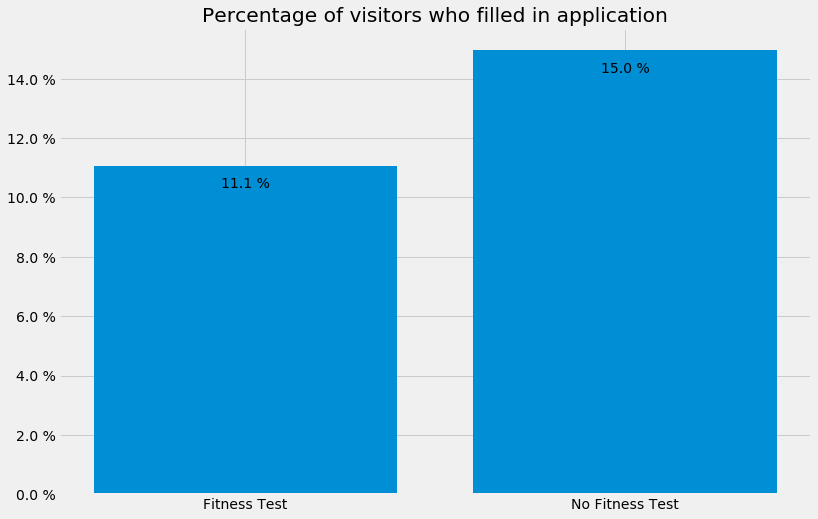

In [78]:
# Percent of visitors who apply

plt.figure(figsize=(12,8))
ax = plt.subplot()
data_app = app_pivot['Percent with Application'].values
plt.bar(range(len(data_app)), data_app)
ax.set_xticks(range(len(data_app)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])

# Add percentage sign to y-ticks
y_vals = ax.get_yticks()
ax.set_yticklabels([str(i) + ' %' for i in y_vals])

# Add title and data labels to each bar
plt.title('Percentage of visitors who filled in application')
ax.text(0, data_app[0]-0.75, str(round(data_app[0], 1)) + ' %', ha='center')
ax.text(1, data_app[1]-0.75, str(round(data_app[1], 1)) + ' %', ha='center')

plt.savefig('applicants.png')

plt.show()


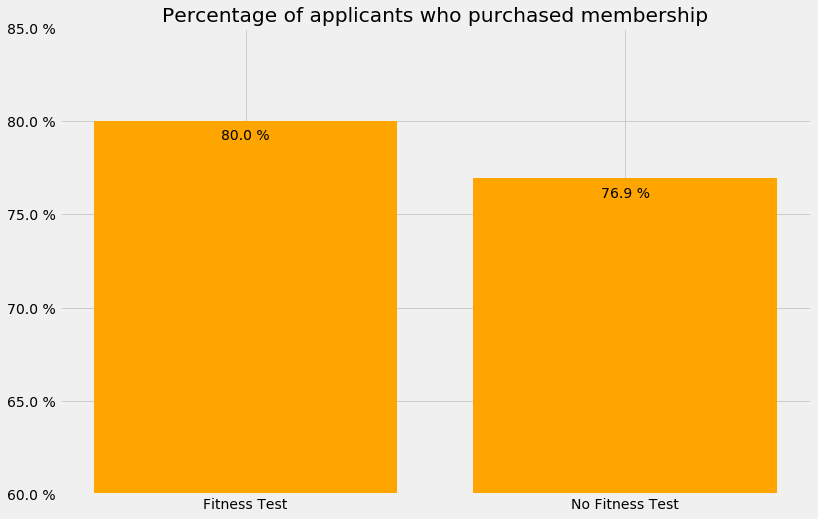

In [81]:
# Percent of applicants who purchase a membership

plt.figure(figsize=(12,8))
ax = plt.subplot()
data_purchase = member_pivot['Percent Purchase'].values
plt.bar(range(len(data_purchase)), data_purchase, color='orange')
ax.set_xticks(range(len(data_purchase)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])

plt.ylim(60,85)

# Add percentage sign to y-ticks
y_vals = ax.get_yticks()
ax.set_yticklabels([str(i)+ ' %' for i in y_vals])

# Add title and data labels to each bar
plt.title('Percentage of applicants who purchased membership')
ax.text(0, data_purchase[0]-1, str(round(data_purchase[0], 1)) + ' %', ha='center')
ax.text(1, data_purchase[1]-1, str(round(data_purchase[1], 1)) + ' %', ha='center')

plt.savefig('applicants-purchase.png')

plt.show()


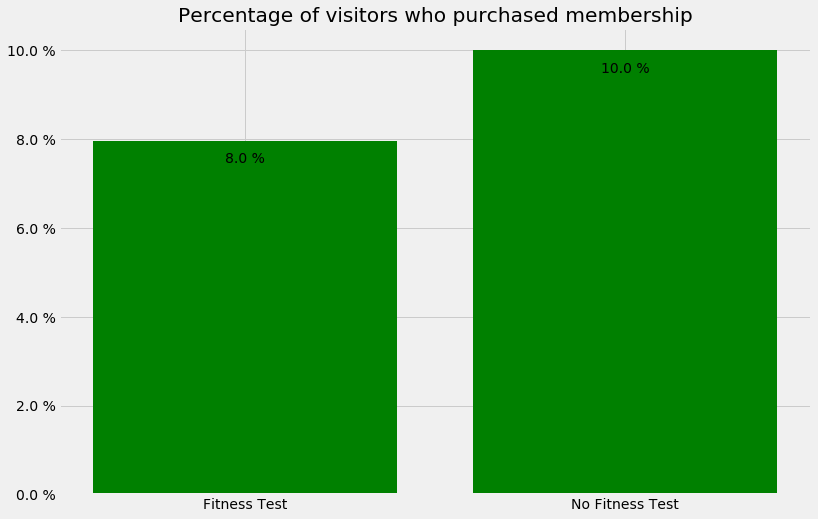

In [82]:
# Percent of visitors who purchase a membership

plt.figure(figsize=(12,8))
ax = plt.subplot()
data_all = final_member_pivot['Percent Purchase'].values
plt.bar(range(len(data_all)), data_all, color='green')
ax.set_xticks(range(len(data_all)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])

# Add percentage sign to y-ticks
y_vals = ax.get_yticks()
ax.set_yticklabels([str(i)+ ' %' for i in y_vals])

# Add title and data labels to each bar
plt.title('Percentage of visitors who purchased membership')
ax.text(0, data_all[0]-0.5, str(round(data_all[0], 1)) + ' %', ha='center')
ax.text(1, data_all[1]-0.5, str(round(data_all[1], 1)) + ' %', ha='center')

plt.savefig('visitor-purchase.png')

plt.show()